<style>img {width:250px !important}</style>

# KAP Bildirim Analizi

Bu proje kapsamında Kamu Aydınlatma Platformu'na yapılan bildirimlerin düzenli olarak okunması, bildirim içerisinde geçen ifadelerin analiz edilerek kategorize edilmesi, bu bildirimlerin içerisinden belirli kategorilere giren bildirimler üzerinden aksiyon planlanabilmesine olanak sağlamaktır.

Proje üç kısımdan oluşmaktadır. 
* İlk kısım webscraping ile KAP'tan şirket ve bildirim verilerinin okunması ve kaydedilmesidir. 
* İkinci kısım ise bildirimler üzerinde NLP ile analizler yapılarak bildirimlerin kategorize edilmesidir.
* Üçünci kısım ise belirlenen kategoride bildirim tespit edilmesi durumunda alınacak aksiyonun tetiklenmesidir.

## Proje Adımları

### KAP Şirket Bilgilerinin Okunması

* Firma bilgileri https://www.kap.org.tr/en/bist-sirketler adresinden alınmaktadır. Bu sayfada tek bir tablo içerisinde tüm firma kod, ünvan, şehir bilgileri ve şirketlerin detay sayfalarının url'leri yer almaktadır. (**reader.read_companies_list()**)

<div>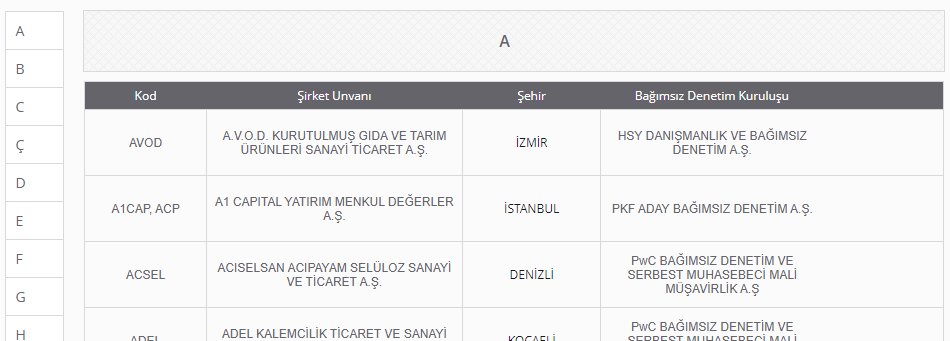</div>

* Bu sayfadan elde edilen şirket url'leri üzerinde bir döngü ile şirket detay bilgileri okunur. (**reader.read_companies()**)

* Her şirketin detay bilgileri şirketin detay sayfası üzerinden okunur. (**reader.read_company_detail()**)

<div>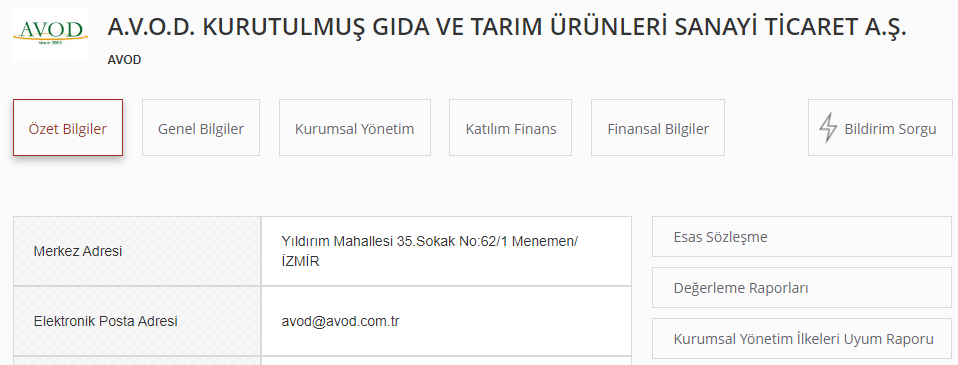</div>

* Okunan bilgiler (**database.save_company(company)**) ile veritabanına (sqlite) yazılır.

**Komut Satırı**:
```
python kap_reader.py -c
```

**Module**:
```python
import kap_reader

reader = kap_reader.reader()
reader.read_companies()
```

### KAP Bildirimlerinin Okunması

KAP bildirimleri 
```python
https://www.kap.org.tr/{lang}/Bildirim/{id}
``` 
adresinden 
```python
reader.get_notification(id, lang='tr')
```
komutu ile okunabilmekdedir.

Bildirimler KAP'ın anasayfasında liste şeklide yer almakta olup tıklanınca aynı ekranda popup şeklinde görünmekte, aynı zamanda url'yi de güncellemektedir. Url'deki yeni adres bildirimin detaylarının tutulduğu sayfayı göstermektedir. Bu adres üzerinden scraping işlemi yapılmaktadır.

Bildirimler sayfasından id bilgisine ulaşılamadığı için uygulama içerisinde bir başlangıç id'si yer almaktadır (1083300, 2022-12-01). Veritabanında son bildirim okunarak (**database.get_last_nofitication()**) bundan sonra bir döngü içerisinde (**reader.read_notifications(limit=100)**) incremental bir şekilde **limit** parametresinde yer alan sayı kadar veya boş sayfa görülene kadar (**limit=-1**) okuma işlemi gerçekleştirilir ve **KAP_NOTIFICATIONS** tablosuna yazılır.



**Komut Satırı**
```
python kap_reader.py -n 200
```

**Module**
```python
import kap_reader

reader = kap_reader.reader()
reader.read_notifications(limit=200)
```

### KAP Bilgilerinin Kaydedilmesi

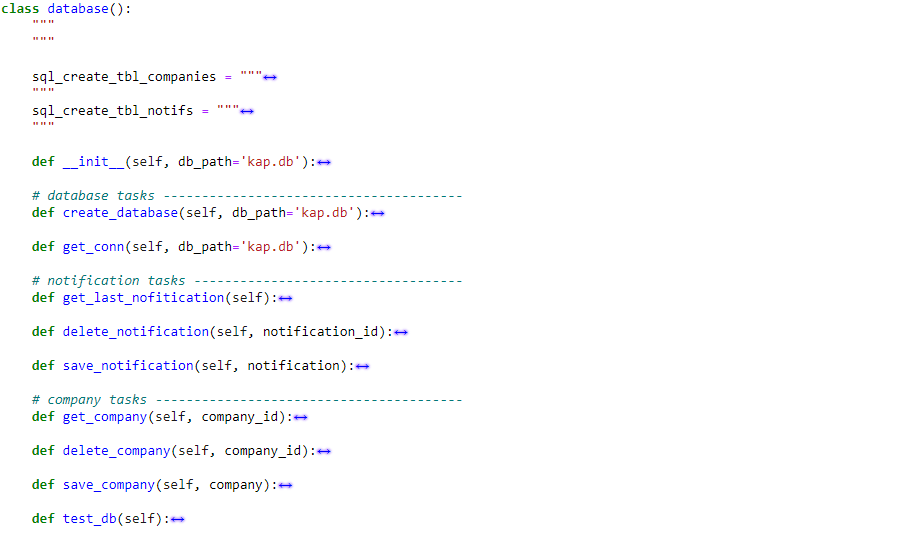

## module details

In [281]:
import kap_reader
imp.reload(kap_reader)
help(kap_reader)

Help on module kap_reader:

NAME
    kap_reader - This module is responsible for scraping KAP (Public Disclosure Platform) website to get the stock market company details and the notifications that are broadcasted continiously.

DESCRIPTION
    Module consists of two main classes:
    - database: for handling the collected data in a sqlite3 database
    - reader: class responsible for collecting the data from target website
    
    #################################################
    # USAGE (Module)
    #################################################
    
    import kap_reader
    kapdb = kap_reader.database()
    kaprd = kap_reader.reader()
    
    kapdb.create_database()                   # drop database and recreate
    kapdb.get_conn()
    kapdb.test_db()    
    kapdb.get_company('AVOD')                 # get single company from database
    
    comps = kaprd.read_companies()            # read summary table
    kaprd.read_company_detail(comps[0][-1])   # read a single compa

In [239]:
import time
imp.reload(kap_reader)

kr = kap_reader.reader()
kd = kap_reader.database()
kr._refresh_all_notifications(1090001)

{'columns': ['min(NOTIFICATION_ID)', 'min(PUBLISH_DATE)', 'count(*)'],
 'data': [(1080001, '01.12.2022 02:47:56', 10392)]}

Start refreshing all notifications:1090001-1090394
..........|..........|..........|..........|..........|| 50 1090051
..........|..........|..........|..........|..........|| 100 1090101
..........|..........|..........|..........|..........|| 150 1090151
..........|..........|..........|..........|..........|| 200 1090201
..........|..........|..........|..........|..........|| 250 1090251
..........|..........|..........|..........|..........|| 300 1090301
..........|..........|..........|..........|..........|| 350 1090351
..........|..........|..........|..........|..
refreshing all notifications completed


In [242]:
import time
imp.reload(kap_reader)

kr = kap_reader.reader()
kd = kap_reader.database()

kdf = kd.read_data(sql='select max(NOTIFICATION_ID), max(date(PUBLISH_DATE)), count(*) from KAP_NOTIFICATIONS')[0]
display(kdf)


{'columns': ['max(NOTIFICATION_ID)', 'max(date(PUBLISH_DATE))', 'count(*)'],
 'data': [(1090428, None, 10428)]}

In [280]:
!python kap_reader.py -d 10

['CODE', 'NOTIFICATION_ID', 'PUBLISH_DATE', 'DISCLOSURE_TYPE', 'YEAR', 'PERIOD', 'SUMMARY_INFO', 'RELATED_COMPANIES', 'EXPLANATIONS']
* 16.11.2022 15:39:22  ISKPL.E İşlem Sırasında Devre Kesici Uygulaması Başlamıştır
> İşlem Sırası Durdurma Bildirimi;ISKPL.E İşlem Sırasında Devre Kesici Uygulaması Başlamıştır;İlgili Şirketler;[ISKPL];İlgili Fonlar;[];Türkçe;Devre Kesici Uygulaması;Bildirim İçeriği;Açıklamalar;ISKPL.E işlem sırasında sürekli işleme ara verilmiş, tek fiyat emir toplama başlamıştır.
https://www.kap.org.tr/tr/Bildirim/1080343
----------------------------------------------------------------------
* 17.11.2022 10:03:49  CONSE.E İşlem Sırasında Devre Kesici Uygulaması Başlamıştır
> İşlem Sırası Durdurma Bildirimi;CONSE.E İşlem Sırasında Devre Kesici Uygulaması Başlamıştır;İlgili Şirketler;[CONSE];İlgili Fonlar;[];Türkçe;Devre Kesici Uygulaması;Bildirim İçeriği;Açıklamalar;CONSE.E işlem sırasında sürekli işleme ara verilmiş, tek fiyat emir toplama başlamıştır.
https://www.kap.